In [1]:
%matplotlib inline

from pathlib import Path

import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots


### 17.1

In [78]:
s11_df = pd.read_csv('D:\숙탯 2기\dmba-datasets\Sept11Travel.csv')
s11_df

,Month-Year,AirRPM,RailPM,VMT_billions
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88
...,...,...,...,...
167,3-Dec,57795908,489403554,237.60
168,4-Jan,53447972,410338691,217.30
169,4-Feb,52608801,389778365,210.40
170,4-Mar,63600019,453014590,247.50


In [45]:
s11_df[s11_df['Month-Year']=='Dec-00']

,Month-Year,AirRPM,RailPM,VMT_billions
131,Dec-00,55380280,461651082,218.44


In [46]:
s11_df[s11_df['Month-Year']=='1-Jan']

,Month-Year,AirRPM,RailPM,VMT_billions
132,1-Jan,53129922,379458113,209.26


In [79]:
d0 = s11_df.iloc[:132]
j1 = s11_df.iloc[132:]

In [80]:
j1['Month-Year'] =  '0'+ j1['Month-Year'].astype(str)
j1.head()

<ipython-input-80-8fa48cd501c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j1['Month-Year'] =  '0'+ j1['Month-Year'].astype(str)


,Month-Year,AirRPM,RailPM,VMT_billions
132,01-Jan,53129922,379458113,209.26
133,01-Feb,49992995,366288212,199.91
134,01-Mar,62323049,448912584,231.49
135,01-Apr,59801562,455496342,231.37
136,01-May,60246477,462376555,244.25


In [81]:
d0['Date'] = pd.to_datetime(d0['Month-Year'], format='%b-%y')
j1['Date'] = pd.to_datetime(j1['Month-Year'], format='%y-%b')

<ipython-input-81-4b3ba95f1b33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d0['Date'] = pd.to_datetime(d0['Month-Year'], format='%b-%y')
<ipython-input-81-4b3ba95f1b33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j1['Date'] = pd.to_datetime(j1['Month-Year'], format='%y-%b')


In [54]:
d0

,Month-Year,AirRPM,RailPM,VMT_billions,Date
0,Jan-90,35153577,454115779,163.28,1990-01-01
1,Feb-90,32965187,435086002,153.25,1990-02-01
2,Mar-90,39993913,568289732,178.42,1990-03-01
3,Apr-90,37981886,568101697,178.68,1990-04-01
4,May-90,38419672,539628385,188.88,1990-05-01
...,...,...,...,...,...
127,Aug-00,66924512,558060051,247.77,2000-08-01
128,Sep-00,56441629,446489429,227.33,2000-09-01
129,Oct-00,58834210,462329685,236.55,2000-10-01
130,Nov-00,56283261,442268378,222.80,2000-11-01


In [56]:
j1.head()

,Month-Year,AirRPM,RailPM,VMT_billions,Date
132,01-Jan,53129922,379458113,209.26,2001-01-01
133,01-Feb,49992995,366288212,199.91,2001-02-01
134,01-Mar,62323049,448912584,231.49,2001-03-01
135,01-Apr,59801562,455496342,231.37,2001-04-01
136,01-May,60246477,462376555,244.25,2001-05-01


In [82]:
s11_df = pd.concat([d0, j1])
s11_df

,Month-Year,AirRPM,RailPM,VMT_billions,Date
0,Jan-90,35153577,454115779,163.28,1990-01-01
1,Feb-90,32965187,435086002,153.25,1990-02-01
2,Mar-90,39993913,568289732,178.42,1990-03-01
3,Apr-90,37981886,568101697,178.68,1990-04-01
4,May-90,38419672,539628385,188.88,1990-05-01
...,...,...,...,...,...
167,03-Dec,57795908,489403554,237.60,2003-12-01
168,04-Jan,53447972,410338691,217.30,2004-01-01
169,04-Feb,52608801,389778365,210.40,2004-02-01
170,04-Mar,63600019,453014590,247.50,2004-03-01


In [58]:
s11_df[s11_df.Date == '2001-09-01']

,Month-Year,AirRPM,RailPM,VMT_billions,Date
140,01-Sep,39106905,446266947,224.57,2001-09-01


In [83]:
before_df = s11_df.iloc[:140]
after_df = s11_df.iloc[141:]

#### a.

In [65]:
before_df.AirRPM.max()

69003617

In [66]:
before_df.AirRPM.min()

29672427

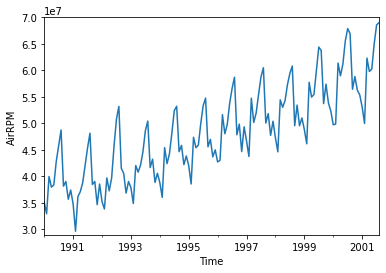

In [87]:
airRPM_ts = pd.Series(before_df['AirRPM'].values, index=before_df.Date, name='AirRPM')
ax = airRPM_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('AirRPM')
ax.set_ylim(29000000, 70000000)
plt.show()

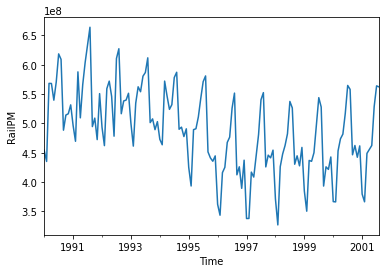

In [85]:
RailPM_ts = pd.Series(before_df['RailPM'].values, index=before_df.Date, name='RailPM')
ax = RailPM_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('RailPM')
plt.show()

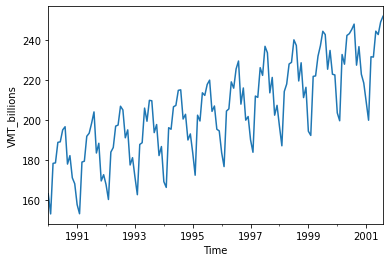

In [86]:
vmt_ts = pd.Series(before_df['VMT_billions'].values, index=before_df.Date, name='VMT_billions')
ax = vmt_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('VMT_billions')
plt.show()

#### b.

#### c.

In [88]:
airRPM_df = tsatools.add_trend(airRPM_ts, trend='ct')
airRPM_lm = sm.ols(formula='np.log(AirRPM) ~ trend', data=airRPM_df).fit()

#### d.

In [90]:
airRPM_df = tsatools.add_trend(airRPM_ts, trend='c')
airRPM_df['Month'] = airRPM_df.index.month

airRPM_lm_season = sm.ols(formula='AirRPM ~ C(Month)', data=airRPM_df).fit()


In [91]:
print(airRPM_lm_season.summary())

                            OLS Regression Results                            
Dep. Variable:                 AirRPM   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     5.603
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           2.72e-07
Time:                        15:52:56   Log-Likelihood:                -2407.5
No. Observations:                 140   AIC:                             4839.
Df Residuals:                     128   BIC:                             4874.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.271e+07   2.15e+06     19.

#### e.

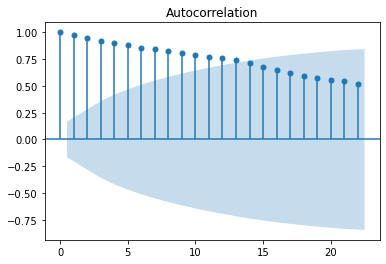

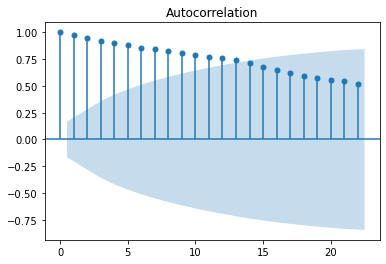

In [93]:
residual = airRPM_df.AirRPM - airRPM_lm_season.predict(airRPM_df)
tsaplots.plot_acf(residual)

### 17.2

In [95]:
workHours = pd.read_csv('D:\숙탯 2기\dmba-datasets\CanadianWorkHours.csv')
workHours.tail()

,Year,Hours
30,1996,35.7
31,1997,35.5
32,1998,35.6
33,1999,36.3
34,2000,36.5


In [97]:
workHours['Year2'] = pd.to_datetime(workHours.Year, format='%Y')

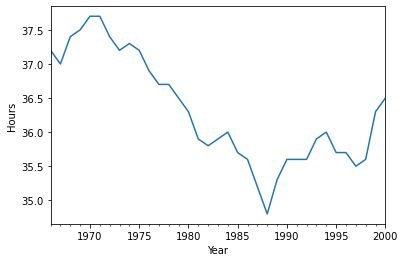

In [99]:
hours_ts = pd.Series(workHours['Hours'].values, index=workHours.Year2, name='Hours')
ax = hours_ts.plot()
ax.set_xlabel('Year')
ax.set_ylabel('Hours')
plt.show()

#### a.

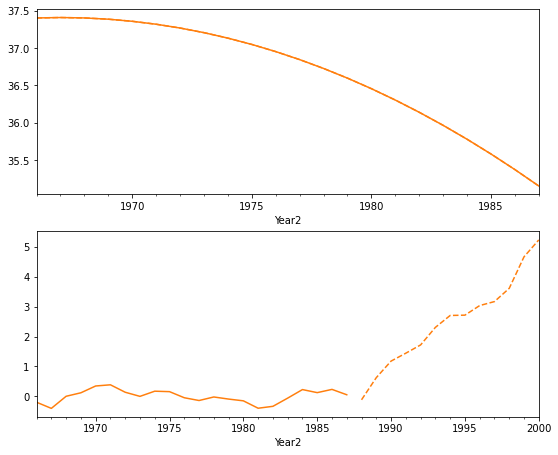

In [113]:
# hours_df = tsatools.add_trend(hours_ts, trend='ct')
# nValid = 13
# nTrain = len(hours_ts) - nValid

# train_df = hours_df[:nTrain]
# valid_df = hours_df[nTrain:]

# hours_lm_poly = sm.ols(formula='Hours ~ trend + np.square(trend)', data=train_df).fit()

# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))

# hours_lm_poly.predict(train_df).plot(ax=axes[0], color='C1')
# hours_lm_poly.predict(train_df).plot(ax=axes[0], color='C1', linestyle='dashed')
    
# residual = train_df.Hours - hours_lm_poly.predict(train_df)
# residual.plot(ax=axes[1], color='C1')
# residual = valid_df.Hours - hours_lm_poly.predict(valid_df)
# residual.plot(ax=axes[1], color='C1', linestyle='dashed')


# plt.show()

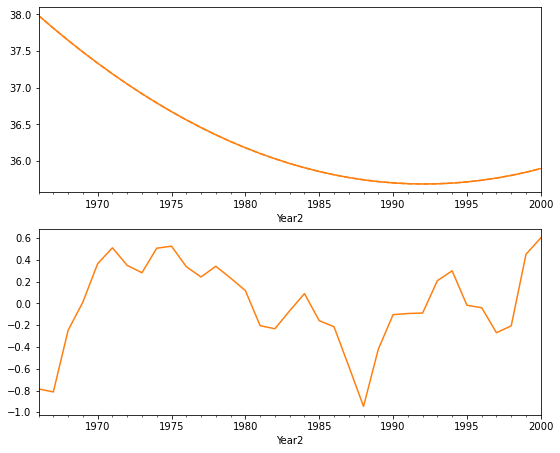

In [115]:
hours_lm_poly = sm.ols(formula='Hours ~ trend + np.square(trend)', data=hours_df).fit()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))

hours_lm_poly.predict(hours_df).plot(ax=axes[0], color='C1')
hours_lm_poly.predict(hours_df).plot(ax=axes[0], color='C1', linestyle='dashed')
    
residual = hours_df.Hours - hours_lm_poly.predict(hours_df)
residual.plot(ax=axes[1], color='C1')


plt.show()

In [116]:
hours_df

,Hours,const,trend
Year2,,,
1966-01-01,37.2,1.0,1.0
1967-01-01,37.0,1.0,2.0
1968-01-01,37.4,1.0,3.0
1969-01-01,37.5,1.0,4.0
1970-01-01,37.7,1.0,5.0
1971-01-01,37.7,1.0,6.0
1972-01-01,37.4,1.0,7.0
1973-01-01,37.2,1.0,8.0
1974-01-01,37.3,1.0,9.0


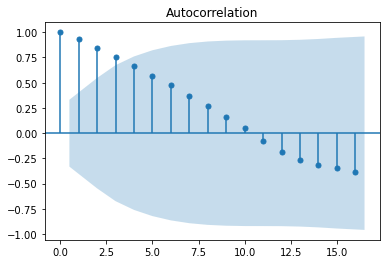

[ 1.          0.92827786  0.83907157  0.75243724  0.66489363  0.5711929
  0.47340041  0.36878832  0.26492963  0.16369487  0.04740503 -0.08222525
 -0.18483692 -0.26088464 -0.31045932 -0.34629088 -0.3809144  -0.4222536
 -0.43949689 -0.43855458 -0.41680275 -0.38853008 -0.35354174 -0.29956243
 -0.25714397 -0.22719563 -0.2070935  -0.17875588 -0.14213083 -0.11126022
 -0.07402466 -0.04542725 -0.01976552  0.00544158  0.00761791]


C:\Users\judyj\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\judyj\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [118]:
tsaplots.plot_acf(hours_df['1966-01-01':'2000-01-01'].Hours)
plt.show()
print(stattools.acf(hours_df['1966-01-01':'2000-01-01'].Hours))

In [119]:
hours_arima = ARIMA(hours_ts, order=(1, 0, 0)).fit(disp=0)
print(pd.DataFrame({'coef': hours_arima.params, 'std err': hours_arima.bse}))

                  coef   std err
const        36.561214  0.523229
ar.L1.Hours   0.938029  0.046229


C:\Users\judyj\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\judyj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

### 17.3

In [137]:
revenues = pd.read_csv('D:\숙탯 2기\dmba-datasets\ToysRUsRevenues.csv')
revenues

,Index,QuarterYear,Revenue(in million $),Quarter
0,1,Q1-92,1026,Q1
1,2,Q2-92,1056,Q2
2,3,Q3-92,1182,Q3
3,4,Q4-92,2861,Q4
4,5,Q1-93,1172,Q1
5,6,Q2-93,1249,Q2
6,7,Q3-93,1346,Q3
7,8,Q4-93,3402,Q4
8,9,Q1-94,1286,Q1
9,10,Q2-94,1317,Q2


#### a.

In [138]:
quarter2 = revenues[revenues.Quarter == 'Q2'].index
revenues_df = revenues.drop(quarter2)

In [139]:
revenues_df

,Index,QuarterYear,Revenue(in million $),Quarter
0,1,Q1-92,1026,Q1
2,3,Q3-92,1182,Q3
3,4,Q4-92,2861,Q4
4,5,Q1-93,1172,Q1
6,7,Q3-93,1346,Q3
7,8,Q4-93,3402,Q4
8,9,Q1-94,1286,Q1
10,11,Q3-94,1449,Q3
11,12,Q4-94,3893,Q4
12,13,Q1-95,1462,Q1


In [132]:
revenues_df['QuarterYear'].str[-2:]

0     92
2     92
3     92
4     93
6     93
7     93
8     94
10    94
11    94
12    95
14    95
15    95
Name: QuarterYear, dtype: object

In [141]:
revenues_df['Year'] = pd.to_datetime(revenues_df['QuarterYear'].str[-2:], format='%y')


revenues_df

,Index,QuarterYear,Revenue(in million $),Quarter,Year
0,1,Q1-92,1026,Q1,1992-01-01
2,3,Q3-92,1182,Q3,1992-01-01
3,4,Q4-92,2861,Q4,1992-01-01
4,5,Q1-93,1172,Q1,1993-01-01
6,7,Q3-93,1346,Q3,1993-01-01
7,8,Q4-93,3402,Q4,1993-01-01
8,9,Q1-94,1286,Q1,1994-01-01
10,11,Q3-94,1449,Q3,1994-01-01
11,12,Q4-94,3893,Q4,1994-01-01
12,13,Q1-95,1462,Q1,1995-01-01


In [123]:
revenues_ts = pd.Series(revenues_df['Hours'].values, index=revenues_df.Year2, name='Hours')

revenues_df = tsatools.add_trend(revenues_ts, trend='ct')
revenues_df = tsatools.add_trend(revenues_ts, trend='c')
revenues_df['Month'] = revenues_df.index.month

revenues_lm = sm.ols(formula='Revenue(in million $) ~ trend + C(Month)', data=revenues_df).fit()

NameError: name 'revenues_ts' is not defined

### 17.4

In [142]:
stockPrice = pd.read_csv('D:\숙탯 2기\dmba-datasets\WalMartStock.csv')
stockPrice

,Date,Close
0,5-Feb-01,53.84
1,6-Feb-01,53.20
2,7-Feb-01,54.66
3,8-Feb-01,52.30
4,9-Feb-01,50.40
...,...,...
243,29-Jan-02,57.91
244,30-Jan-02,59.75
245,31-Jan-02,59.98
246,1-Feb-02,59.26


#### a.

In [143]:
stockPrice['Date2'] = pd.to_datetime(stockPrice['Date'], format='%d-%b-%y')
stockPrice

,Date,Close,Date2
0,5-Feb-01,53.84,2001-02-05
1,6-Feb-01,53.20,2001-02-06
2,7-Feb-01,54.66,2001-02-07
3,8-Feb-01,52.30,2001-02-08
4,9-Feb-01,50.40,2001-02-09
...,...,...,...
243,29-Jan-02,57.91,2002-01-29
244,30-Jan-02,59.75,2002-01-30
245,31-Jan-02,59.98,2002-01-31
246,1-Feb-02,59.26,2002-02-01


In [145]:
stockPrice_ts = pd.Series(stockPrice.Close.values, index=stockPrice.Date2, name='stockPrice')
stockPrice_arima = ARIMA(stockPrice_ts, order=(1, 0, 0)).fit(disp=0)
print(pd.DataFrame({'coef': stockPrice_arima.params, 'std err': stockPrice_arima.bse}))

                       coef   std err
const             52.951056  1.328333
ar.L1.stockPrice   0.955839  0.018709


C:\Users\judyj\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\judyj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

#### b, c.

기울기의 계수가 1에 가까우므로 확률보행과정을 따르지 않음

#### d.

한 기간으로부터 다른 기간까지의 변화가 무작위로 진행된다.